# ANALYSIS FOR BOLT

### Goals
- Identify subset with largest impact on attrition rate
- Devise data-driven recommendations to decrease attrition rate
- Outline what success looks like, measurements of efficacy

## START ANALYSIS

### Set up

In [5]:
# Packages installation
install.packages("plotly")
install.packages("GGally")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [6]:
# Libraries
library(GGally)
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(plotly)

In [7]:
# Read data
data <- read_delim("/home/jupyter/datathon/dataset.csv", delim = ";")
head(data, 6)

Rows: 10168 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (6): Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Cat...
dbl (7): CLIENTNUM, Customer_Age, Dependent_count, Months_on_book, Total_Rel...
num (1): Credit_Limit

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
768805383,Attrited Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716
713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010


### Clean data
No missing values but there are rows with 'Unknown' values

In [8]:
# Recode Age Group
data$age_group[data$Customer_Age <= 25] <- "18-25"
data$age_group[25 < data$Customer_Age & data$Customer_Age < 40] <- "26-39"
data$age_group[40 <= data$Customer_Age & data$Customer_Age < 50] <- "40-49"
data$age_group[50 <= data$Customer_Age & data$Customer_Age < 60] <- "50-59"
data$age_group[60 <= data$Customer_Age & data$Customer_Age < 70] <- "60-69"
data$age_group[70 <= data$Customer_Age & data$Customer_Age < 80] <- "70-79"

Warning message:
“Unknown or uninitialised column: `age_group`.”


In [9]:
# Check duplicate
# Remove unknowns
sum(is.na(data))

[1] 0

**NOTE**: From onwards only used `cleaned_data` as dataset nma vi chua clean nen tam dung `data`

In [10]:
# Split data
attritioned <- data %>%
  filter(Attrition_Flag == "Attrited Customer")

existing <- data %>%
  filter(Attrition_Flag != "Attrited Customer")

### Summary of dataset

In [11]:
# Dimension of dataset
dim(data)
dim(attritioned)
dim(existing)

[1] 10168    15

[1] 2192   15

[1] 7976   15

In [12]:
## Categorize columns into data types
# Quantitative
quantitative_col <- c('Customer_Age', 'Dependent_count', 'Months_on_book', 
                      'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                      'Contacts_Count_12_mon', 'Credit_Limit')

summary(data[quantitative_col])

  Customer_Age   Dependent_count Months_on_book Total_Relationship_Count
 Min.   :18.00   Min.   :0.000   Min.   :13     Min.   :1.000           
 1st Qu.:40.00   1st Qu.:1.000   1st Qu.:32     1st Qu.:3.000           
 Median :46.00   Median :2.000   Median :36     Median :4.000           
 Mean   :44.73   Mean   :2.346   Mean   :36     Mean   :3.809           
 3rd Qu.:51.00   3rd Qu.:3.000   3rd Qu.:40     3rd Qu.:5.000           
 Max.   :73.00   Max.   :5.000   Max.   :56     Max.   :6.000           
 Months_Inactive_12_mon Contacts_Count_12_mon  Credit_Limit  
 Min.   :0.000          Min.   :0.000         Min.   : 1439  
 1st Qu.:2.000          1st Qu.:2.000         1st Qu.: 2781  
 Median :2.000          Median :2.000         Median : 5370  
 Mean   :2.344          Mean   :2.446         Mean   : 9245  
 3rd Qu.:3.000          3rd Qu.:3.000         3rd Qu.:13547  
 Max.   :6.000          Max.   :6.000         Max.   :34516  

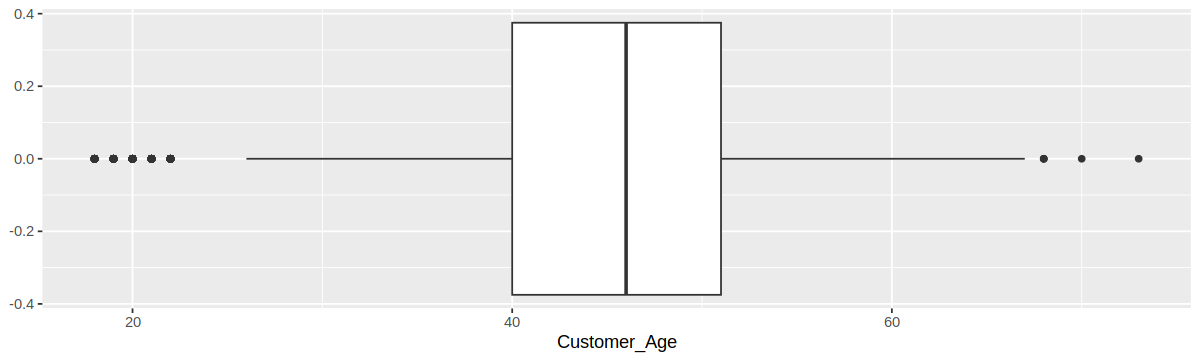

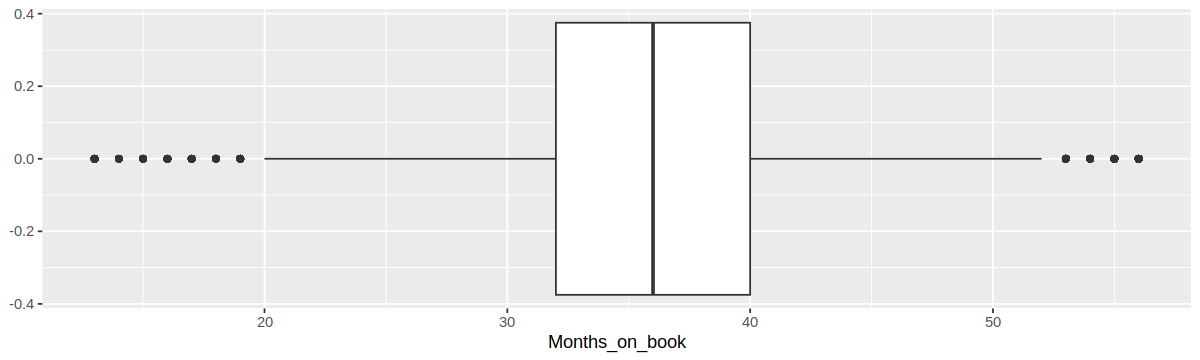

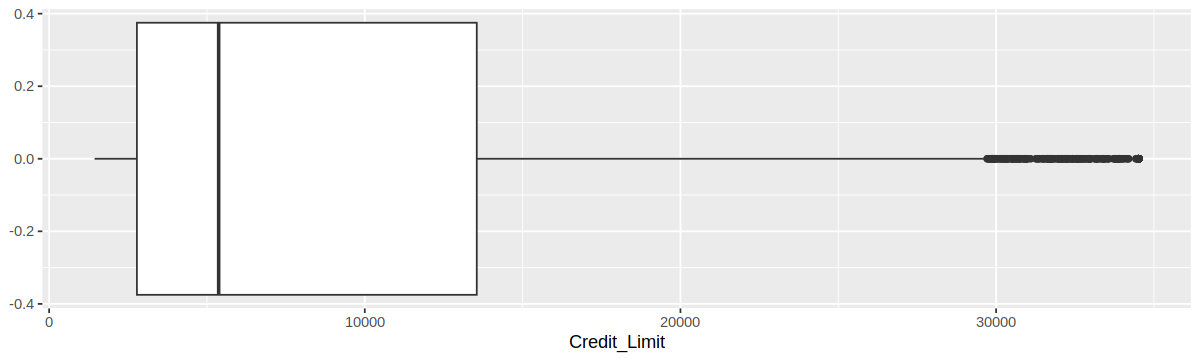

In [13]:
options(repr.plot.width = 10, repr.plot.height = 3)
# Boxplot for age distribution
ggplot(data, aes(y = Customer_Age)) + 
  geom_boxplot() +
  coord_flip()

ggplot(data, aes(y = Months_on_book)) + 
  geom_boxplot() +
  coord_flip()

ggplot(data, aes(y = Credit_Limit)) + 
  geom_boxplot() +
  coord_flip()

In [14]:
# Categorical
unique(data$Attrition_Flag)
unique(data$Gender)
unique(data$Education_Level)
unique(data$Marital_Status)
unique(data$Income_Category)
unique(data$Card_Category)

[1] "Attrited Customer" "Existing Customer"

[1] "M" "F"

[1] "High School"   "Graduate"      "Uneducated"    "College"      
[5] "Unknown"       "Post-Graduate" "Doctorate"

[1] "Married"  "Single"   "Unknown"  "Divorced"

[1] "$60K - $80K"    "Less than $40K" "$80K - $120K"   "$40K - $60K"   
[5] "$120K +"        "Unknown"

[1] "Blue"     "Gold"     "Platinum" "Silver"

**NOTE**: Education_Level, Marital_Status, Income_Category contains 'Unknown' values

In [15]:
# Not helpful
# options(repr.plot.width = 20, repr.plot.height = 20)
# ggpairs(data)

### Exploratory Graphs and Tables

In [16]:
attrition_rate_total <- data %>%
    group_by(Attrition_Flag) %>%
    summarise(n = n(), 
           percent = n / nrow(data) * 100)

attrition_rate_total

Attrition_Flag,n,percent
<chr>,<int>,<dbl>
Attrited Customer,2192,21.55783
Existing Customer,7976,78.44217


In [17]:
attrition_rate_total <- data %>%
    group_by(Card_Category) %>%
    summarise(n = n(), 
           percent = n / nrow(data) * 100)

attrition_rate_total

Card_Category,n,percent
<chr>,<int>,<dbl>
Blue,9334,91.7977970
Gold,111,1.0916601
Platinum,20,0.1966955
Silver,703,6.9138474


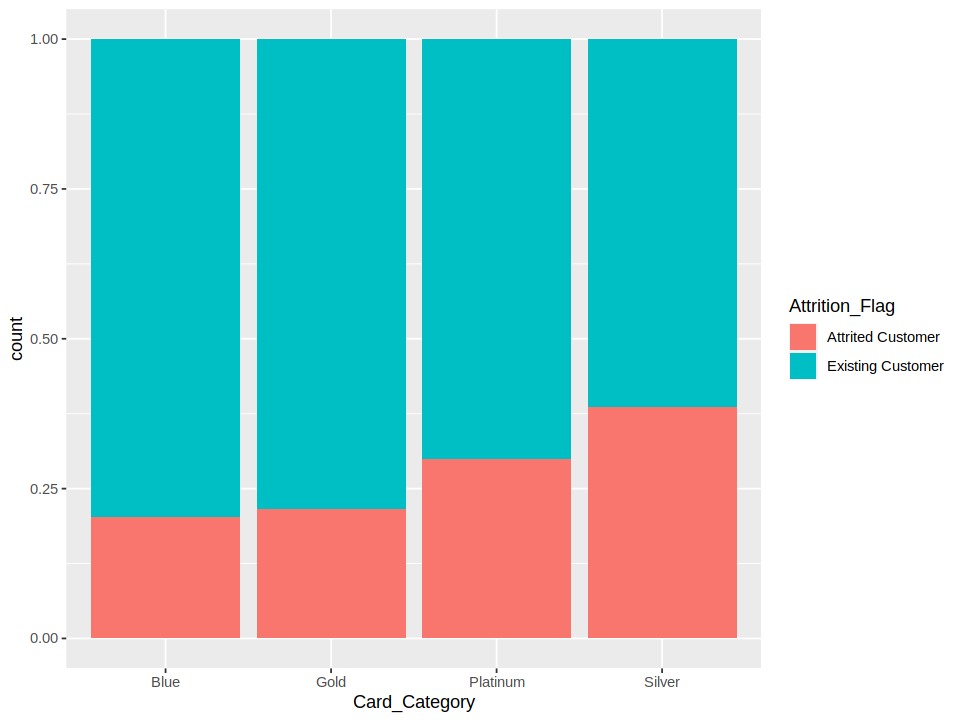

In [18]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, aes(x = Card_Category, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

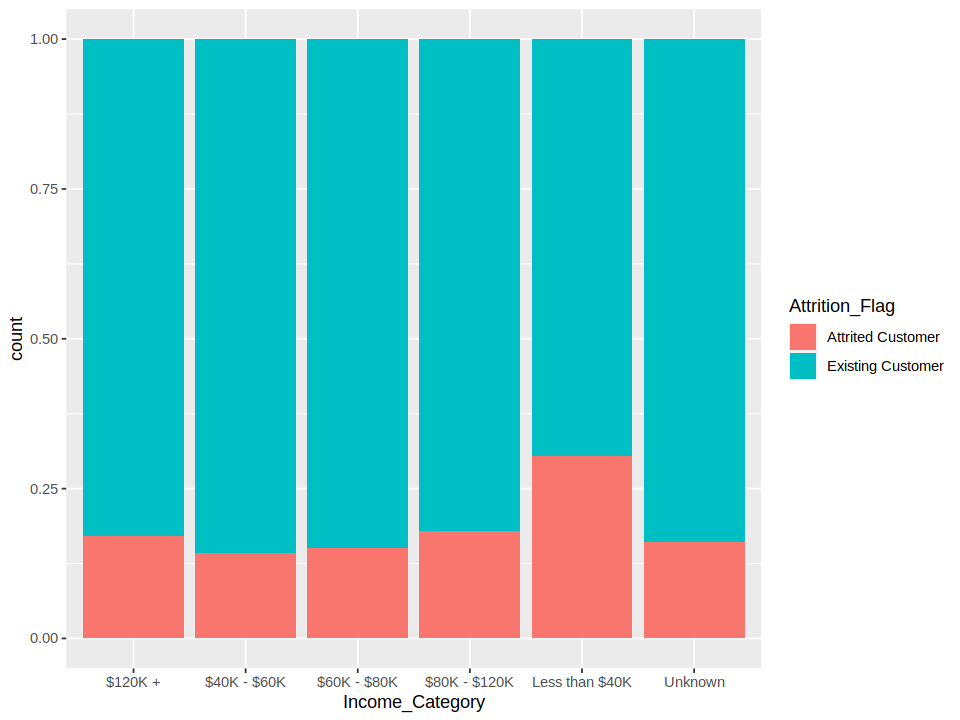

In [19]:
ggplot(data, aes(x = Income_Category, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

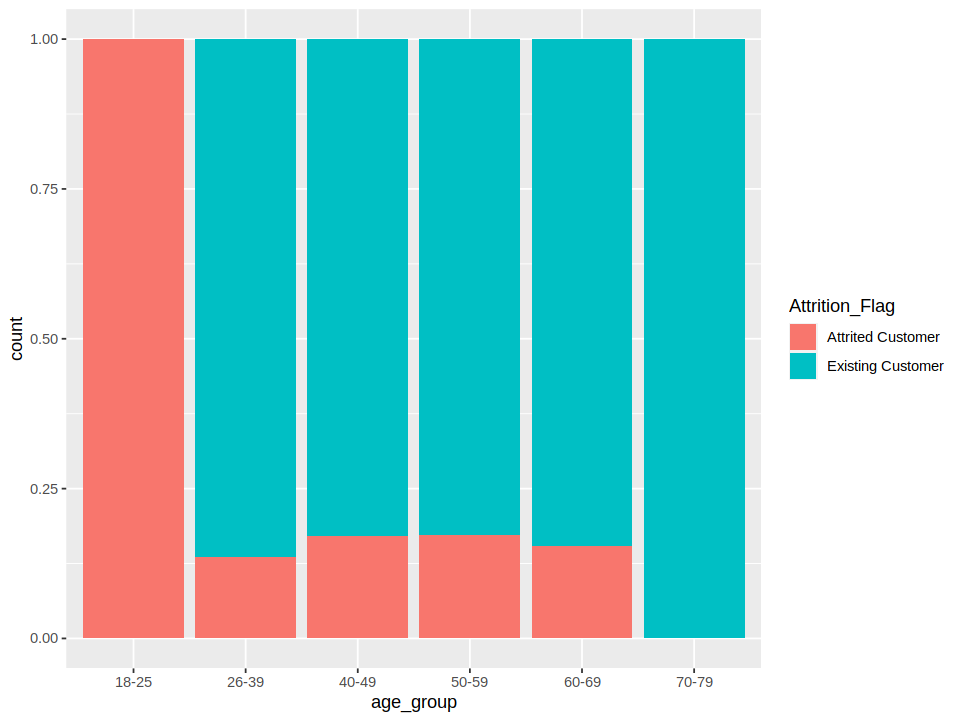

In [20]:
ggplot(data, aes(x = age_group, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

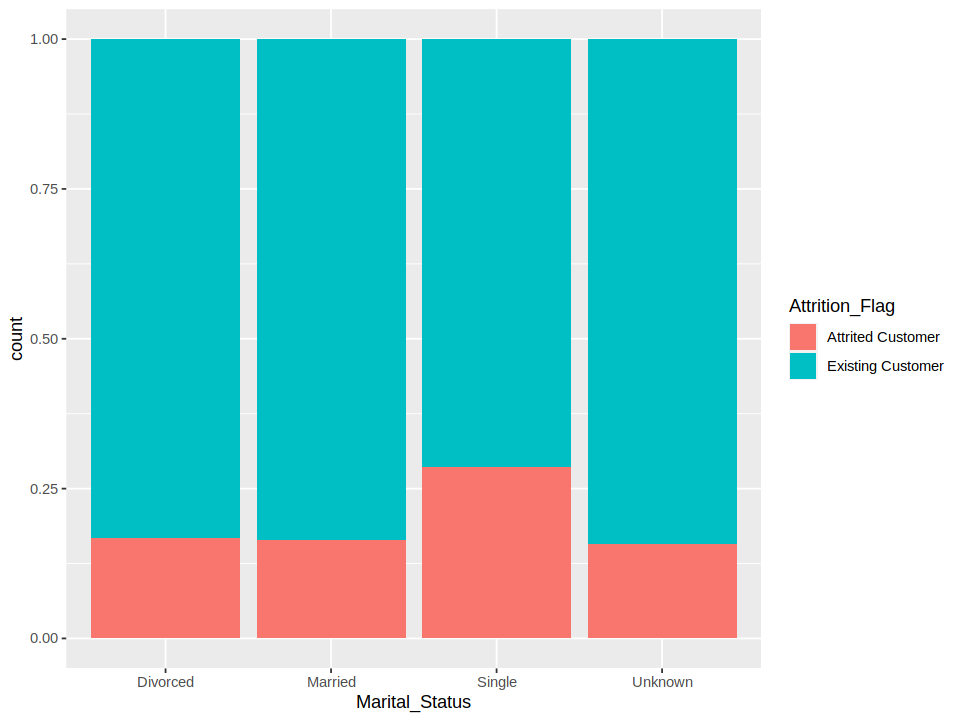

In [21]:
ggplot(data, aes(x = Marital_Status, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

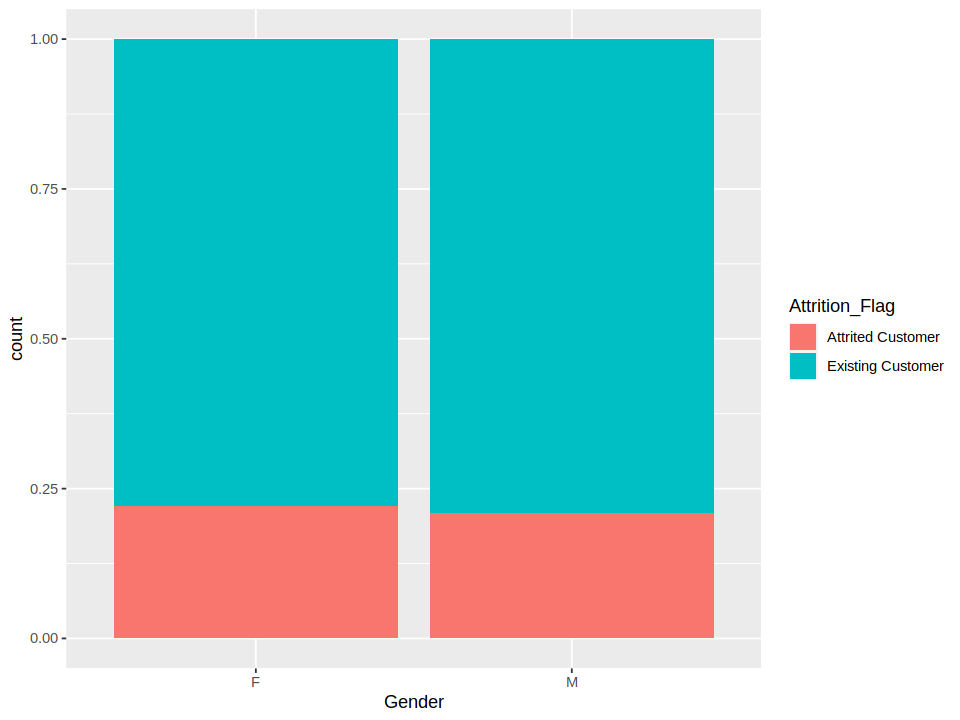

In [22]:
ggplot(data, aes(x = Gender, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

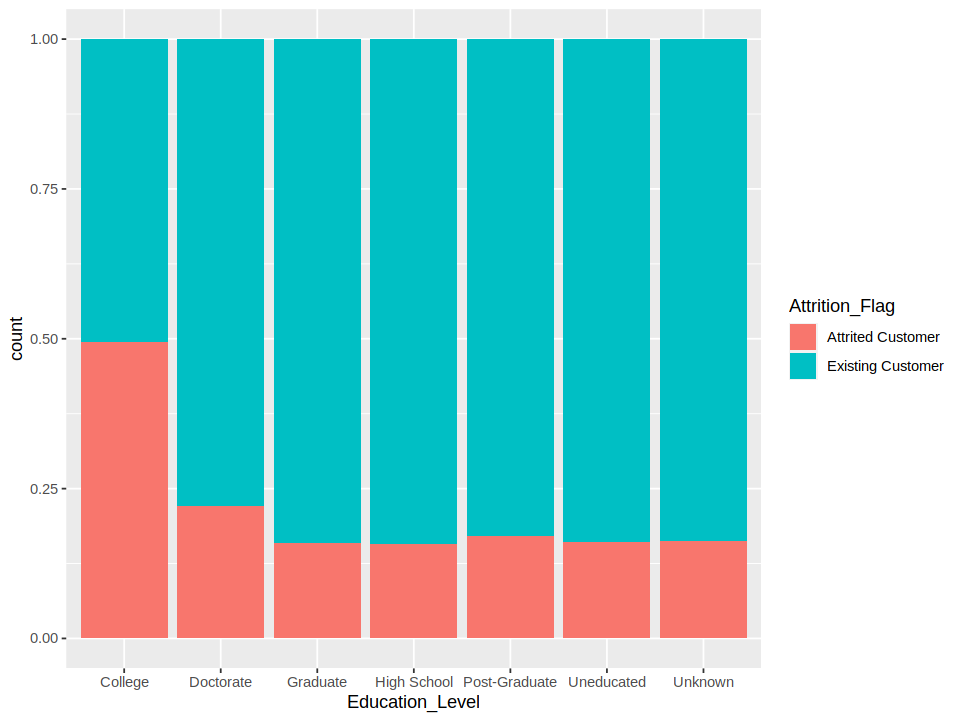

In [23]:
ggplot(data, aes(x = Education_Level, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

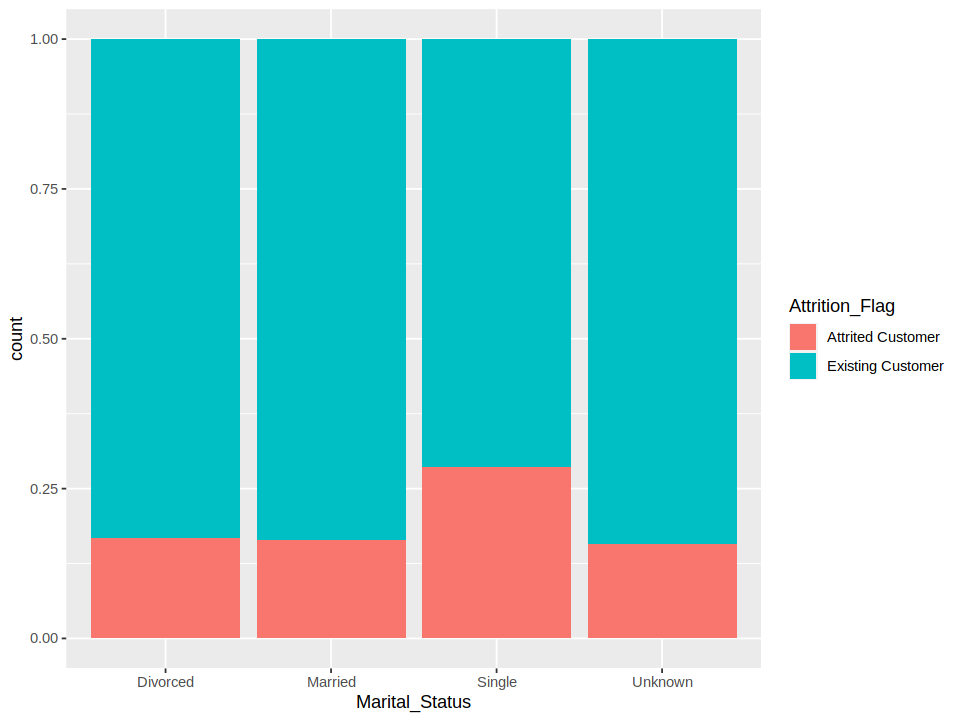

In [24]:
ggplot(data, aes(x = Marital_Status, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

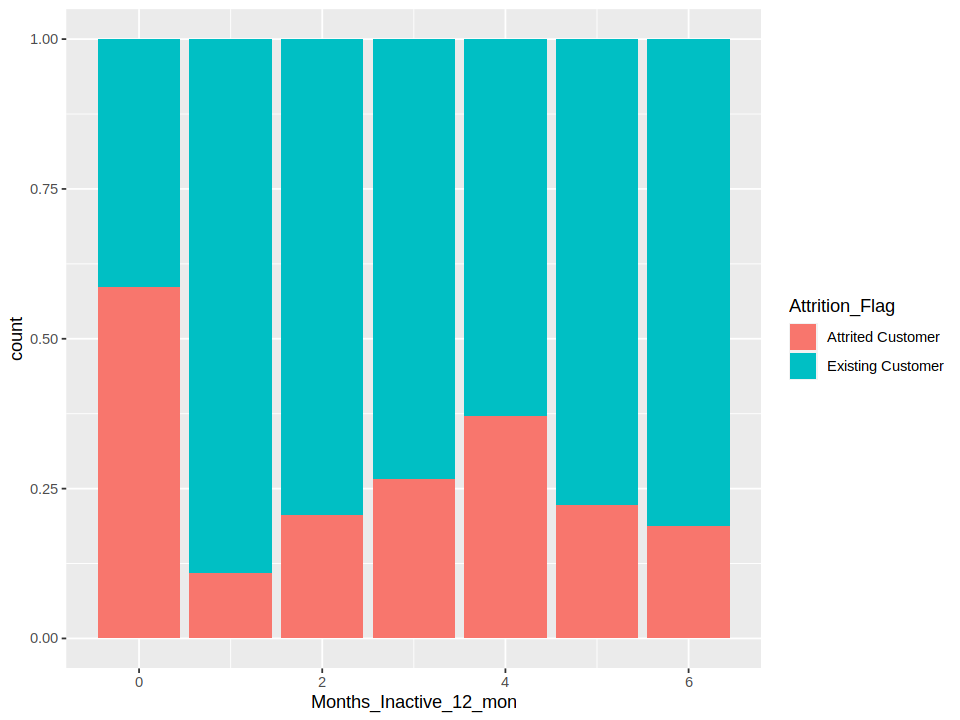

In [25]:
ggplot(data, aes(x = Months_Inactive_12_mon, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

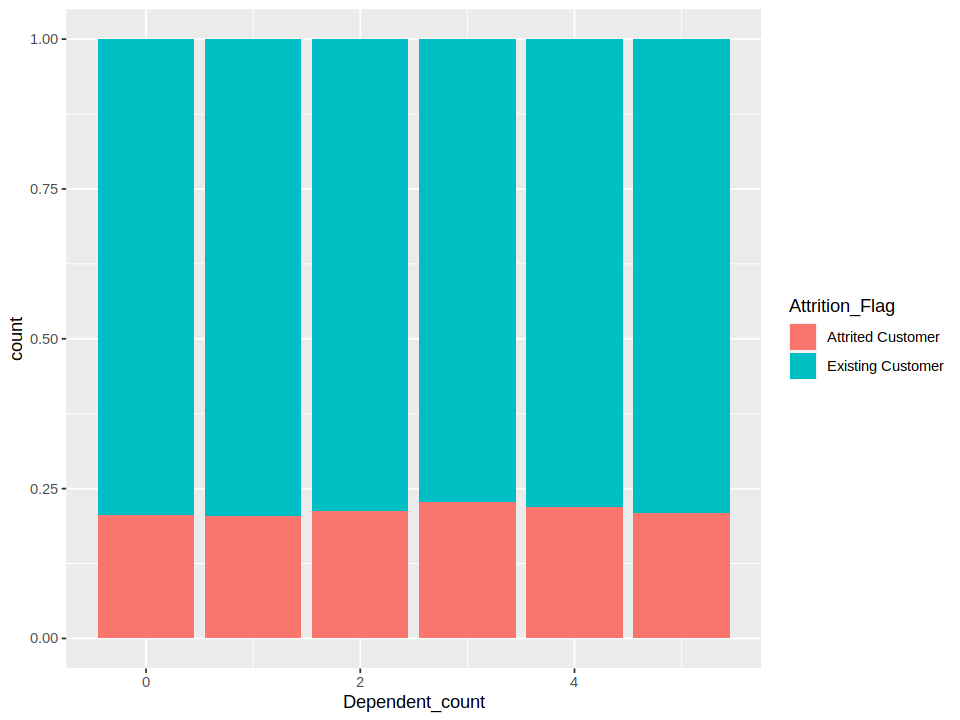

In [26]:
ggplot(data, aes(x = Dependent_count, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

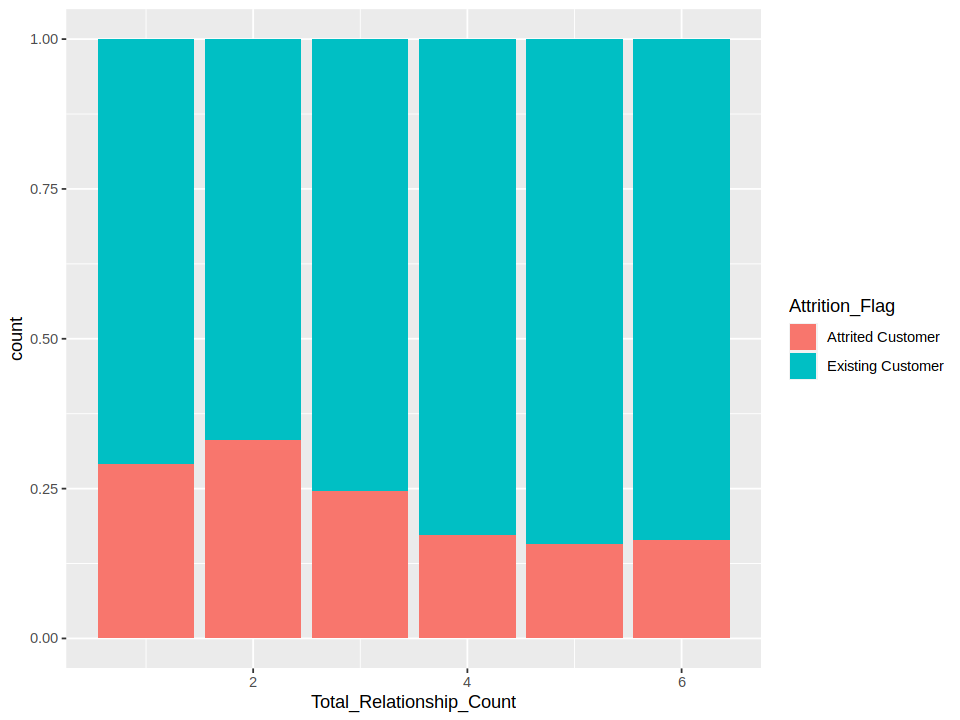

In [27]:
ggplot(data, aes(x = Total_Relationship_Count, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

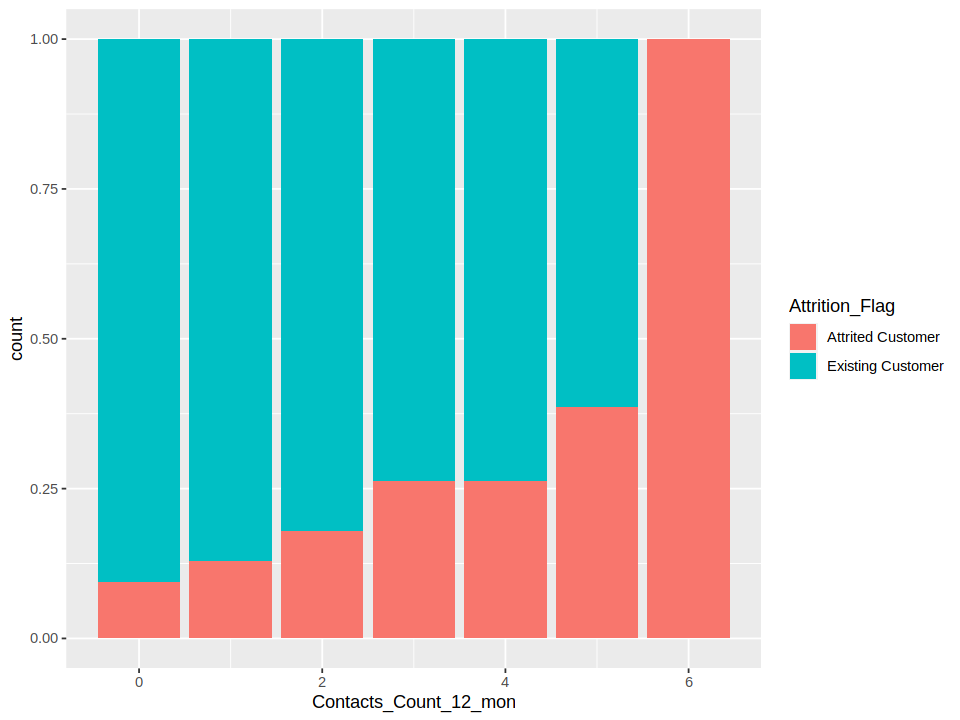

In [28]:
ggplot(data, aes(x = Contacts_Count_12_mon, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

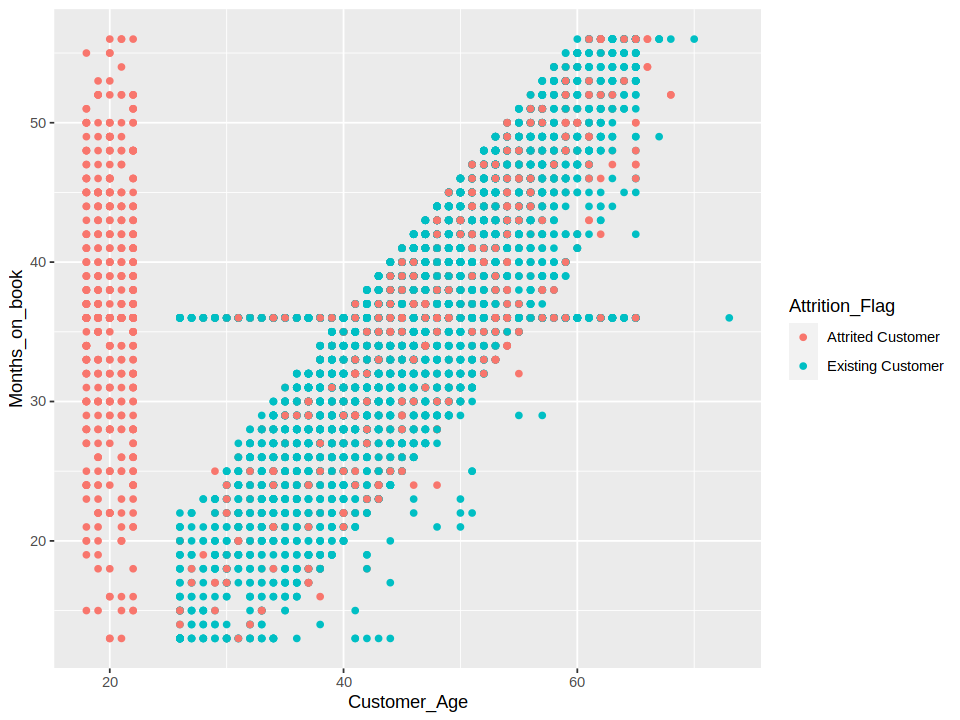

In [29]:
data %>%
  ggplot(aes(x = Customer_Age, y = Months_on_book, color = Attrition_Flag)) +
  geom_point()

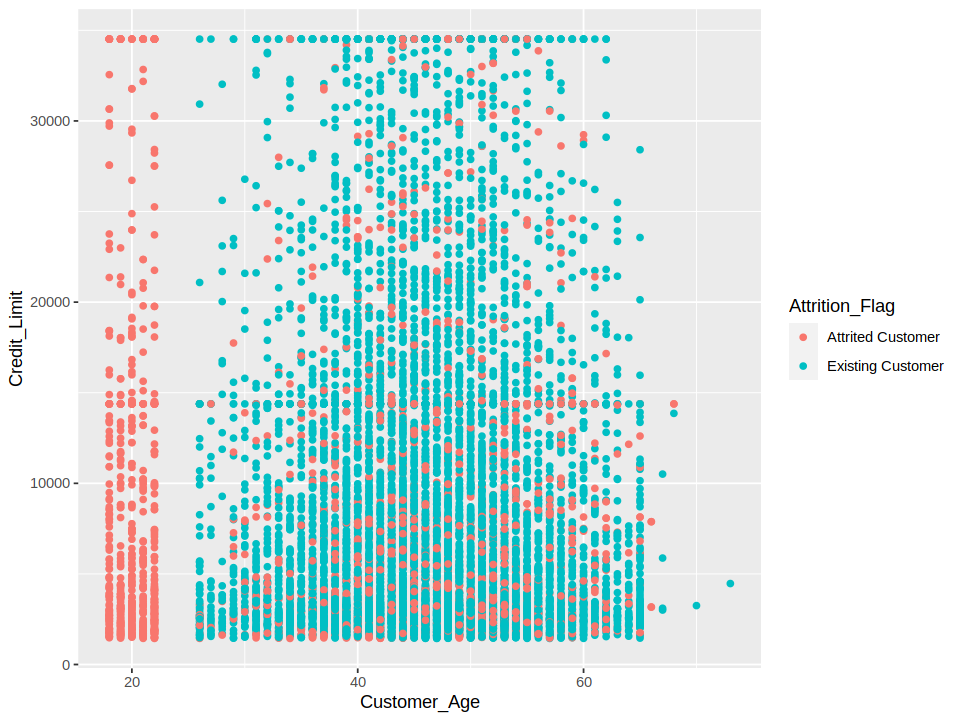

In [30]:
data %>%
  ggplot(aes(x = Customer_Age, y = Credit_Limit, color = Attrition_Flag)) +
  geom_point()

#### Comments and directions for analysis
**Comments**
- Subsets prone to attrition: 
     * `age_group`: 18 - 25
     * `Income_Category`: Less than $40k
     * `Marital_Status`: Single
     * `Education_Level`: College
     * `Months_Inactive_12_mon`: 0
     * `Contacts_Count_12_mon`: 6
- Within each card category, silver has the highest turnover rate even though blue has the highest number of attrited customers (most likely because blue card is the most popular)

**Direction**
- Analyse the characteristics of attrited group only - `attritioned` dataset (done by Thu hihi) => patterns to why they left
- Analyse the characteristics of exisiting group only - `existing` dataset => patterns to why they stay
- Analyse according to `Card_Category` => find common characteristics